# Characteristics of a loan affecting the estimated return for an investor



## Investigation Overview

> Prosper is a peer-to-peer lending marketplace, wherein individuals and institutions can invest in the loans for others and earn attractive returns. I analyzed the dataset from an investor's perspective with an intention to find out what characteristics of the loan contribute to higher return (i.e. Estimated Return) for the investor.

> My main focus is on Borrower Rate (or interest rate) and the two proprietary variables: Prosper Rating and Prosper Score and their relationships with the Estimated Return.


## Dataset Overview

> The data consisted of 113,937 loan records with 81 variables on each loan. Some of the variables including Prosper Rating and Prosper Score were populated only after 1-July-2009. So, I restricted my analysis to only the loan records that contained the required information. After wrangling, the final record count was 83,982.
 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

In [3]:
# select records from after 2009
df = df.loc[df['CreditGrade'].isnull()]

# remove duplicates 
df = df.drop_duplicates(subset=['ListingKey'], keep='first')

# convert 'BorrowerRate' and 'EstimatedReturn' to percent
df['BorrowerRate'] = df['BorrowerRate']*100
df['EstimatedReturn'] = df['EstimatedReturn']*100

# convert 'ProsperRating' into ordered categorical types
ordinal_rating = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(ordered_var)

# drop records with null value for 'ProsperScore' and convert it into int
df = df.dropna(subset=['ProsperScore'])
df['ProsperScore'] = df['ProsperScore'].astype(int)

## Distribution of Estimated Return

> While majority of the returns are over 0%, there are few returns that are negative. I used log transformation on the y-axis to get an idea of the number of loans with negative return. The distribution is slightly skewed left with peak at around 9%. 

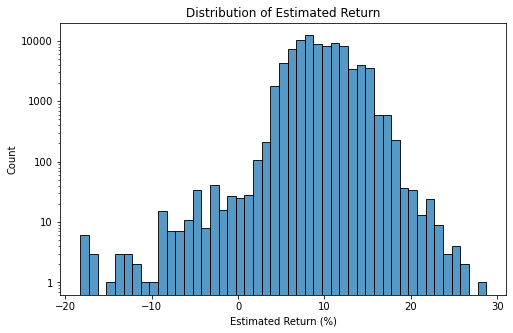

In [4]:
# Plot an histogram showing distribution of 'EstimatedReturn'

f, axes = plt.subplots(figsize = (8, 5))

# set the y-axis to log scale
axes = plt.gca()
axes.set_yscale('log', base = 10)
plt.yticks([10**i for i in range(5)],[10**i for i in range(5)])

# set the title and the labels
props = {
    'title': 'Distribution of Estimated Return',
    'xlabel': 'Estimated Return (%)',
    'ylabel': 'Count'
}
axes.set(**props)

# plot the graph 
sns.histplot(
    data = df,
    x = "EstimatedReturn",
    binwidth = 1
);

## Distribution of Borrower Interest Rate

> The interest rate ranges from 4% to 36% with multi-modal distribution. One peak is at around 15%, next at around 27% and the biggest spike is at 32%.

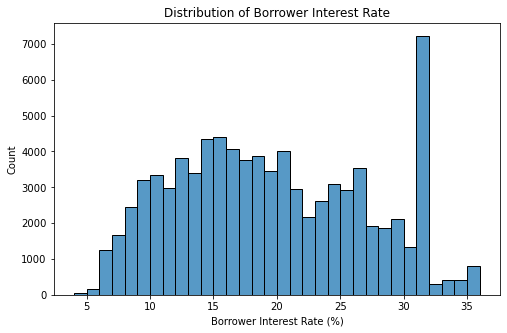

In [5]:
# Plot an histogram showing distribution of 'BorrowerRate'

f, axes = plt.subplots(figsize = (8, 5))

# set the title and the labels
props = {
    'title': 'Distribution of Borrower Interest Rate',
    'xlabel': 'Borrower Interest Rate (%)',
    'ylabel': 'Count'
}
axes.set(**props)

# plot the graph 
sns.histplot(
    data = df,
    x = "BorrowerRate",
    binwidth = 1
);

## Estimated Return vs Borrower Interest Rate

> Generally, when the Borrower Rate increases, the Estimated Return increases at a slower pace (i.e. the slope is < 1). This is because some amount for fees, loss etc is subtracted from the interest rate before arriving at the estimated return. For 1 unit increase in the Borrower Rate, there is fraction of a unit increase in Estimated Return.

> For few instances where the Estimated Return is below zero, the Borrower Rate is 18% or higher. In other words, negative Estimated Return is rare when the Borrower Rate is lower than 18%.

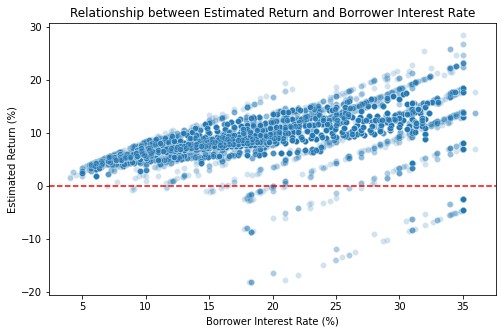

In [6]:
# Plot a scatterplot showing the relationship between 'BorrowerRate' and 'EstimatedReturn'

f, axes = plt.subplots(figsize = (8, 5))

# set the title and the labels
props = {
    'title': 'Relationship between Estimated Return and Borrower Interest Rate',
    'xlabel': 'Borrower Interest Rate (%)',
    'ylabel': 'Estimated Return (%)'
}
axes.set(**props)

# draw a line at 0 estimated return
axes.axhline(0, ls='--', color='red')

# plot the graph
sns.scatterplot(
    data = df,
    x = "BorrowerRate", 
    y = "EstimatedReturn",
    alpha = 1/5      
);

## Estimated Return and Borrower Interest Rate by Prosper Rating and by Prosper Score

> There isn't any surprise when it comes to the Borrower Rate and the categorical variables. Lower interest rate is provided to the best Prosper Rating and to the best Prosper Score. Borrower Rate increases as we move from the best to the worst and the change is prominent at each level. Between the two, Prosper Rating has the most prominent change in Borrower Rate for each of its rating levels.

> The change in Estimated Return is not as prominent as we see in the Borrower Rate for different levels of each categorical variable. The Estimated Return increases a little bit in each level as we move from the best Prosper Rating or the best Prosper Score to the worst. However, worst Prosper Rating or Prosper Score is also characterized with negative Estimated Return outliers.

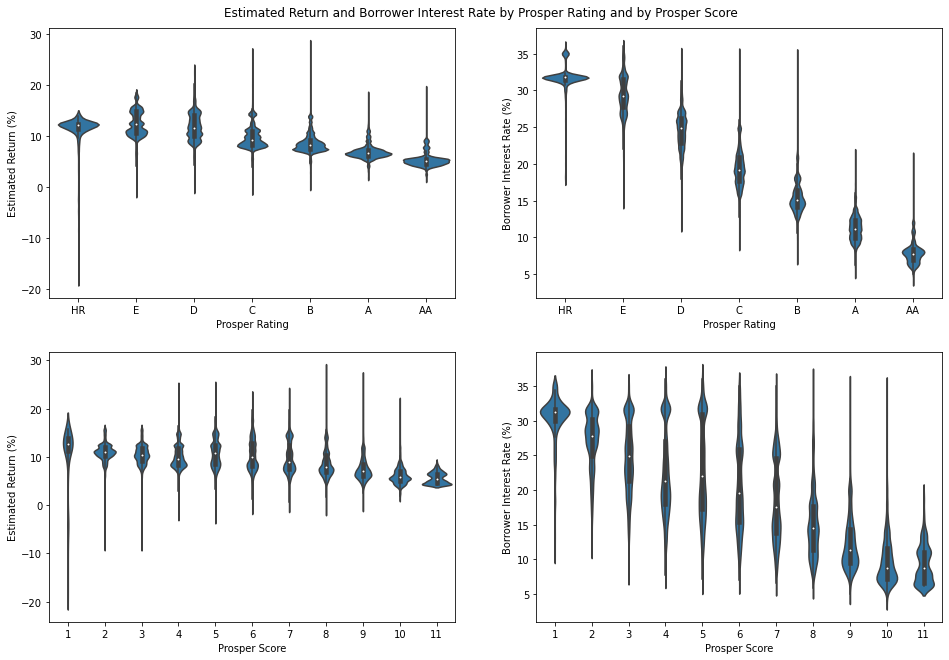

In [7]:
# Plot the distribution of 'ProsperRating (Alpha)', 'ProsperScore'  for 'EstimatedReturn' and 'BorrowerRate'

f, axes = plt.subplots(2, 2, figsize = (16, 10))

# set the title
f.subplots_adjust(top=0.95)
f.suptitle("Estimated Return and Borrower Interest Rate by Prosper Rating and by Prosper Score")

# set the default color
default_color = sns.color_palette()[0]

# plot the graph for 'EstimatedReturn' vs.'ProsperRating (Alpha)'
sns.violinplot(
    data = df, 
    x = 'ProsperRating (Alpha)',
    y = 'EstimatedReturn',
    color = default_color, 
    ax = axes[0,0]
)
axes[0,0].set_xlabel("Prosper Rating")
axes[0,0].set_ylabel("Estimated Return (%)")

# plot the graph for 'EstimatedReturn' vs. 'ProsperScore'
sns.violinplot(
    data = df, 
    x = 'ProsperScore', 
    y = 'EstimatedReturn',
    color = default_color, 
    ax = axes[1,0]
)
axes[1,0].set_xlabel("Prosper Score")
axes[1,0].set_ylabel("Estimated Return (%)")

# plot the graph for 'BorrowerRate' vs.'ProsperRating (Alpha)'
sns.violinplot(
    data = df, 
    x = 'ProsperRating (Alpha)',
    y = 'BorrowerRate',
    color = default_color, 
    ax = axes[0,1]
)
axes[0,1].set_xlabel("Prosper Rating")
axes[0,1].set_ylabel("Borrower Interest Rate (%)")

# plot the graph for 'BorrowerRate' vs. 'ProsperScore'
sns.violinplot(
    data = df, 
    x = 'ProsperScore', 
    y = 'BorrowerRate',
    color = default_color, 
    ax = axes[1,1]
)
axes[1,1].set_xlabel("Prosper Score")
axes[1,1].set_ylabel("Borrower Interest Rate (%)");


## Estimated Return and Borrower Interest Rate by Prosper Rating

> The general trend is as we move from the worst Prosper Rating to the best, the Borrower Rate decreases (i.e the graph shifts left). At the same time, the Estimated Return increases a bit and then decreases (i.e the graph shifts upwards first and then downwards).

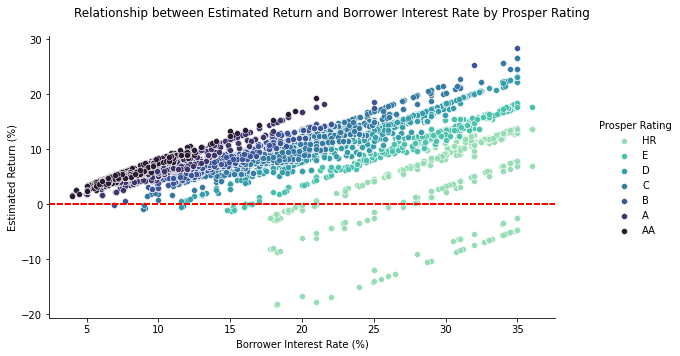

In [8]:
# Plot a graph showing the relationship between 'BorrowerRate' & 'EstimatedReturn' for various 'ProsperRating (Alpha)'

g = sns.FacetGrid(
    data = df, 
    hue = "ProsperRating (Alpha)", 
    height = 5,
    aspect = 1.6,
    palette = 'mako_r'
)

# draw horizontal line at 0 'EstimatedReturn' 
g.map(plt.axhline, y=0, ls='--', c='red')

# plot the graph 
g.map(sns.scatterplot, 'BorrowerRate', 'EstimatedReturn')

# add legend
g.add_legend()
g._legend.set_title("Prosper Rating")

# set the title and the labels
g.set_axis_labels("Borrower Interest Rate (%)", "Estimated Return (%)")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Relationship between Estimated Return and Borrower Interest Rate by Prosper Rating");

## Estimated Return and Prosper Rating by Prosper Score

> Prosper Rating is a better predictor of Estimated Return. Their relationship is in the shape of a candy cane. While moving from the best rating ("AA") to the worst rating ("HR"), the Estimated Return increases up until the penultimate rating ("E") and then drops. This relationship makes sense. The best rating ("AA") is characterized by lower Borrower Rate, which means lower Estimated Return. The worst rating ("HR") is characterized by higher Borrower Rate, which means higher Estimated Return. However, higher Borrower Rate also comes with higher loss percentage, thereby reducing the Estimated Return. The best bet is the Prosper Rating which is better than the worst (i.e. "E").

> Prosper Score is not as clear as Prosper Rating in its relationship with Estimated Return. For each Prosper Rating level, different Prosper Score provides higher Estimated Return. By looking at the Prosper Score alone, we can't say whether it can provide higher Estimated Return. However, combined with Prosper Rating, it can be used as an indicator of Estimated Return. Prosper Score of 8 or 9 provides better Estimated Return in most of the cases.

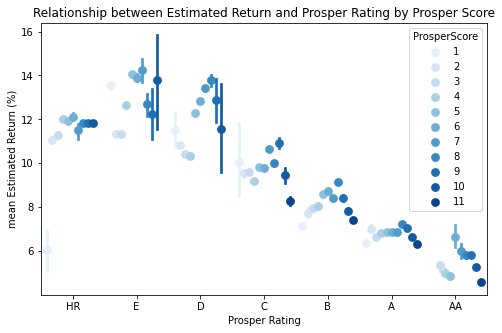

In [9]:
# Plot a pointplot showing the relationship between 'EstimatedReturn', 'ProsperRating (Alpha)' and 'ProsperScore'

f, axes = plt.subplots(figsize = (8, 5))

# plot the graph
sns.pointplot(
    data = df,
    x = "ProsperRating (Alpha)", 
    y = "EstimatedReturn",
    hue = "ProsperScore",
    palette = 'Blues',
    linestyles = '',
    dodge = 0.8      
)

# set the title and the labels
axes.set_title("Relationship between Estimated Return and Prosper Rating by Prosper Score")
axes.set_xlabel("Prosper Rating")
axes.set_ylabel("mean Estimated Return (%)");

In [ ]:
!jupyter nbconvert Prosper_loan_data_Part_II.ipynb --to slides --post serve --no-input --no-prompt